## 1. Import packages and data

In [1]:
###Loading Packages###
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions

import re # regular expressions
import os # Operation System
from datetime import datetime

import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import sys

import time
import math
from pprint import pprint

import matplotlib.pyplot as plt

import nltk as nltk
from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer
import spacy
import multiprocessing
import string

import warnings
warnings.filterwarnings("ignore")

from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.cm as cm

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import metrics

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
from sklearn.cluster import DBSCAN
import time
from timeit import default_timer as timer
from datetime import timedelta

In [4]:
%%time
df = pd.read_json('https://storage.googleapis.com/msca-bdp-data-open/news/news_final_project.json', 
                  orient='records', lines=True) 

In [4]:
df = pd.read_json('news_final_project.json', orient='records', lines=True) 

In [5]:
df

,date,language,title,text
0,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...
1,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...
2,2022-01-06,english,Watch ‘Chicago P.D.’ Preview Wednesday,Chicago PD 9×11 “Lies” Season 9 Episode 11 Pro...
3,2022-01-06,english,Trump’s Solution for Chicago Public Schools? K...,Wise of Foolish?\nThe Chicago Tribune article ...
4,2022-01-06,english,"Family, friends, colleagues gathering today at...",The neighbors near Mashawn Plummer’s Portage P...
...,...,...,...,...
200114,2022-03-05,english,Chicago girl shot after celebrating 12th birth...,Authorities say a girl who was shot in the hea...
200115,2022-03-05,english,Loyola Chicago vs. Northern Iowa – MVC Tournam...,"The No. 4 seed Loyola Chicago Ramblers (23-7, ..."
200116,2022-03-05,english,"DraftKings Illinois Promo Code: $1,050 Bonus a...",Remember to check out the DraftKings Illinois ...
200117,2022-03-05,english,"Sidney, Illinois had a median home valuation o...",[BlockShopper.com] .\n|Buyer||Address||Valuati...


In [6]:
df[df['language'] != 'english']

,date,language,title,text


## 2. Find outliers

### 2.1 Clean the text

In [6]:
df['cleaned_text'] = df['text'].apply(lambda x: re.sub("\n", " ", x))

# remove urls
#pattern = "^http[s]?:\/\/(www\.)?(.*)?\/?(.)*"
pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))'
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(pattern, ' ', x))

# pattern2 = "^(www\.)?(.*)?\/?(.)*"
# df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(pattern2, '', x))

# remove punctuations
# df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

# remove numbers
# df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'[0-9]', '', x))

# keep only alphabetic words
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

# to lower case
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.lower())

In [21]:
df['cleaned_text'][16]

'california has no shortage of golden retriever breeders  but how did you know which one particular to pick  dependable breeders are reliable to get a reason  doing all your investigation on golden retriever breeders in your town will make certain that you re obtaining a healthful pup and forestall heartache  these  dwardi   vyw  blog gold com profile'

In [20]:
df['text'][16]

"California has no shortage of Golden Retriever breeders, but how Did you know which one particular to pick? Dependable breeders are reliable to get a reason. Doing all your investigation on Golden Retriever breeders in your town will make certain that you're obtaining a healthful Pup and forestall heartache. These http://edwardi689vyw0.blog-gold.com/profile"

In [7]:
X = df['cleaned_text']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1123)

### 2.2 Tf-idf Vectorizer

In [8]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(X)
text_new = tfidf.transform(X)

### DBSCAN

In [9]:
# === Fit the DBSCAN model and get the classify labels === #
start = timer()
DBS_clf = DBSCAN(eps=1, min_samples=100).fit(text_new)
end = timer()
elapsed_time = timedelta(seconds=end-start)
print("Time elapsed: ", elapsed_time)

Time elapsed:  0:45:55.562289


In [10]:
print(DBS_clf.labels_)

[0 0 0 ... 0 0 0]


In [11]:
max(DBS_clf.labels_)

2

In [12]:
cluster_result_dbscan = pd.DataFrame({
    "text": list(X),
    "cluster": list(DBS_clf.labels_)
})

In [90]:
cluster_result_dbscan[cluster_result_dbscan['cluster'] == -1]['text'][16]

'california has no shortage of golden retriever breeders  but how did you know which one particular to pick  dependable breeders are reliable to get a reason  doing all your investigation on golden retriever breeders in your town will make certain that you re obtaining a healthful pup and forestall heartache  these http   edwardi   vyw  blog gold com profile'

In [18]:
df['text'][16]

"California has no shortage of Golden Retriever breeders, but how Did you know which one particular to pick? Dependable breeders are reliable to get a reason. Doing all your investigation on Golden Retriever breeders in your town will make certain that you're obtaining a healthful Pup and forestall heartache. These http://edwardi689vyw0.blog-gold.com/profile"

In [13]:
clusters_dbscan = np.array(DBS_clf.labels_)

In [17]:
cluster_result_dbscan[cluster_result_dbscan['cluster'] == -1]

,text,cluster
16,california has no shortage of golden retriever...,-1
31,get each of the tales you would like to know f...,-1
33,before getting demolished by the kansas city r...,-1
38,illinois central college police department one...,-1
69,chicago cbs a police chase that ended on c...,-1
...,...,...
200043,champaign champaign urbana nonprofits are us...,-1
200045,on april the seventh circuit affirme...,-1
200052,top varsity tarso set t shirt shoulder s...,-1
200059,chef mario carbone introduced his nyc energy e...,-1


In [15]:
cluster_result_dbscan.to_pickle('dbscan_cluster.pkl')

In [9]:
cluster_result_dbscan = pd.read_pickle('dbscan_cluster.pkl')

### 2.3 MiniBatchKmeans

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters


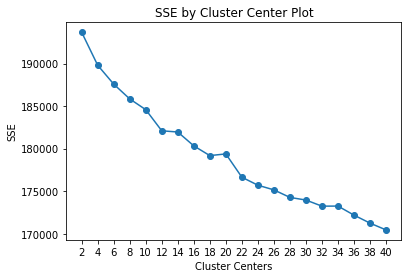

In [54]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text_new, 40)

In [10]:
clusters = MiniBatchKMeans(n_clusters=22, init_size=1024, batch_size=2048, random_state=20).fit_predict(text_new)

In [24]:
cluster_result = pd.DataFrame({
    "text": list(X),
    "cluster": list(clusters)
})

In [124]:
df['text'][200055]

'CHICAGO (CBS) — They’re a local nonprofit that recently landed a major donation from a celebrity, and we wondered what they’re all about and how they help low-income families live a better life.\nMorning Insider Tim McNicholas introduces us to Community Organizing and Family Issues – or COFI.\nIt’s not your average conference call, it’s a pep rally of sorts for COFI – a nonprofit that works to improve the lives of low-income families and their families – and at this meeting, there were at least 2 million reasons why the energy is so high.\n“The greatest donation in our over 20 year history, of $2 million from Mackenzie Scott.”\nScott — the philanthropist and ex-wife of Amazon founder Jeff Bezos —made the donation earlier this month.\nThe parent-based nonprofit says it will help them fund college savings accounts for local kids and fight for change – including increased mental health services in schools.\nIt’s great news for Dexter Leggin – a volunteer and single parent who says COFI h

In [120]:
cluster_result[cluster_result['cluster'] == 19]

,text,cluster
49,chicago may is picking up pretty much where ...,19
54,chicago cbs rainy and chilly day with show...,19
80,visitation held for firefighter mashawn plumme...,19
106,chicago first alert weather wet and chilly w...,19
260,this evening s outlook for carbondale partly ...,19
...,...,...
200047,after knicks loss what can be expected from t...,19
200055,chicago cbs they re a local nonprofit that...,19
200068,chicago cbs an active weekend with ups and...,19
200075,shots fired e rd st get and explore...,19


In [186]:
cluster_result.to_pickle('kmeans_22cluster.pkl')

In [11]:
cluster_result = pd.read_pickle('kmeans_22cluster.pkl')

### 2.4 Plot clusters

Here we plot the clusters generated by our KMeans operation. One plot uses PCA which is better at capturing global structure of the data. The other uses TSNE which is better at capturing relations between neighbors. In order to speed up the process with TSNE, I sample from 3,000 documents and perform a PCA 50 dimension reduction on the data first. Next I show a scatterplot further sampling the sample down to 300 points.

In [48]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

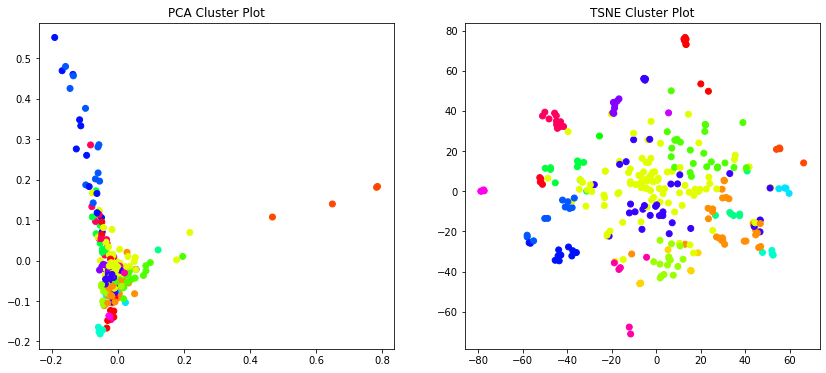

In [54]:
plot_tsne_pca(text_new, clusters)

In [62]:
data = text_new
labels = clusters
max_label = max(labels)
max_items = np.random.choice(range(data.shape[0]), size=10000, replace=False)
    
pca = PCA(n_components=4).fit_transform(data[max_items,:].todense())
#tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
idx = np.random.choice(range(pca.shape[0]), size=10000, replace=False)
label_subset = labels[max_items]
#label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]

In [63]:
result = pd.DataFrame(pca[idx]).rename(columns={0: "first", 1: "second", 2: "third", 3: "fourth"})
result['label'] = label_subset[idx]
result

,first,second,third,fourth,label
0,0.114722,-0.043223,-0.052523,0.015981,6
1,-0.011980,0.006319,-0.037436,0.002307,4
2,0.015489,-0.020897,-0.043412,0.029073,6
3,-0.023242,-0.031936,-0.013227,-0.023212,4
4,-0.021213,0.010960,-0.028177,-0.026773,4
...,...,...,...,...,...
9995,-0.036262,-0.047434,-0.000168,0.007217,15
9996,-0.048767,0.168399,0.076167,0.011726,20
9997,0.017990,-0.036512,-0.076192,0.044642,6
9998,-0.006311,0.028154,-0.008718,-0.024535,4


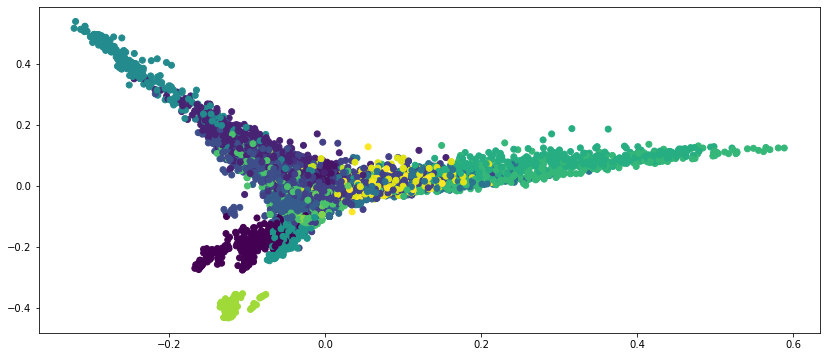

In [60]:
plt.figure(figsize=(14, 6))
plt.scatter(pca[idx, 1], pca[idx, 2], c=label_subset[idx])

In [126]:
result['label'].value_counts()

2     6265
7      889
1      537
6      345
9      326
5      312
8      296
3      292
12     206
13     158
10     155
4       94
11      87
0       38
Name: label, dtype: int64

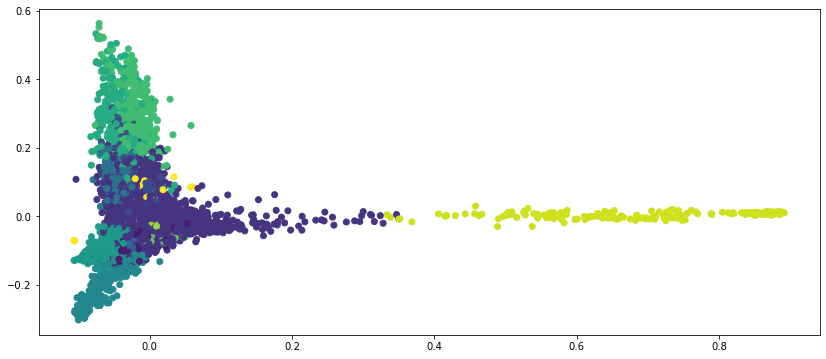

In [127]:
plt.figure(figsize=(14, 6))
plt.scatter(pca[idx, 0], pca[idx, 1], c=label_subset[idx])

### 2.5 Find top keywords in each cluster

In [119]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text_new, clusters, tfidf.get_feature_names(), 20)


Cluster 0
near,parent,insurance,legal,content,attorneys,bankruptcy,law,attorney,injury,section,moms,court,truck,family,chicago,lawyer,accident,divorce,lawyers

Cluster 1
valued,holdings,average,products,additional,llc,research,owns,th,dividend,price,ratio,illinois,company,rating,works,tool,quarter,stock,shares

Cluster 2
masks,new,governor,chicago,mandate,county,people,students,cases,schools,tax,public,mask,health,school,pritzker,covid,said,state,illinois

Cluster 3
guilty,convicted,illinois,police,speaker,charges,said,chicago,judge,sentence,heard,mcdonald,rounds,prison,federal,van,shots,dyke,madigan,fired

Cluster 4
day,read,years,people,home,ago,www,team,just,like,time,state,year,news,new,https,said,com,chicago,illinois

Cluster 5
charged,county,according,woman,department,hospital,vehicle,car,news,block,officer,shooting,year,officers,shot,old,man,chicago,said,police

Cluster 6
time,marketing,online,information,use,service,new,loan,market,mdjobsite,work,experience,services,dumpster,j

In [126]:
get_top_keywords(text_new, clusters_dbscan, tfidf.get_feature_names(), 20)


Cluster -1
day,work,home,news,com,school,business,years,police,city,state,year,people,time,just,like,new,illinois,said,chicago

Cluster 0
team,just,https,company,bears,city,bulls,time,season,game,year,new,police,points,com,state,news,said,illinois,chicago

Cluster 1
fannounce,fans,farmer,fantasy,far,fantastic,fare,fargo,zoom,way,did,price,list,expected,food,quality,quantity,expensive,drinks,menu

Cluster 2
fatal,fantasy,family,famous,fantastic,fans,fannounce,fanduel,far,fan,going,center,united,list,fun,definitely,enjoyed,menu,tower,presentation


### 2.6 Remove outliers

Remove cluster -1, 1, 2 from dbscan result.\
Remove cluster 12, 7 from kmeans result.

In [12]:
dbscan_neg1 = list(cluster_result_dbscan[cluster_result_dbscan['cluster'] == -1].index)
dbscan_1 = list(cluster_result_dbscan[cluster_result_dbscan['cluster'] == 1].index)
dbscan_2 = list(cluster_result_dbscan[cluster_result_dbscan['cluster'] == 2].index)
kmeans_12 = list(cluster_result[cluster_result['cluster'] == 12].index)
kmeans_7 = list(cluster_result[cluster_result['cluster'] == 7].index)

In [13]:
idx_outlier = dbscan_neg1 + dbscan_1 + dbscan_2 + kmeans_12 + kmeans_7

In [14]:
len(idx_outlier)

16799

In [17]:
final = list(set(idx_outlier))

In [18]:
len(final)

16799

In [19]:
outliers = df.index.isin(final)
outliers

array([False, False, False, ..., False, False, False])

In [20]:
cleaned_df = df[~outliers]

In [25]:
cleaned_df.to_pickle('cleaned_data.pkl')

In [6]:
cleaned_df = pd.read_pickle('cleaned_data.pkl')

## Reference:
https://www.kaggle.com/code/jbencina/clustering-documents-with-tfidf-and-kmeans/notebook